Antonio Fernandes Valadares - 11711ECP015 \
Computação Evolutiva \
Universidade Federal de Uberlândia - Engenharia de computação \
Professor: Keiji Yamanaka \
Trabalho 6 : Minimização da função de Rastrigin

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Objetivo: Minimizar a função de Rastrigin.

In [32]:
#### FUNCAO DE RASTRIGIN

def f(x, n, A=10):
  soma = 0
  for i in range(n):
    soma += x[i]**2 - (A * np.cos(2*np.pi*x[i]))

  return (A * n) + soma


In [33]:
f([0,0,0], 3) # Ponto de mínimo é x = 0, f(x) = 0

0.0

In [34]:
#função para facilitar a plotagem

def f2(x1, x2):
  return 10*2 + (x1**2 - 10*np.cos(2*np.pi*x1)) + (x2**2 - 10*np.cos(2*np.pi*x2))

In [35]:
n = 2

Gráfico da função, para duas variáveis.

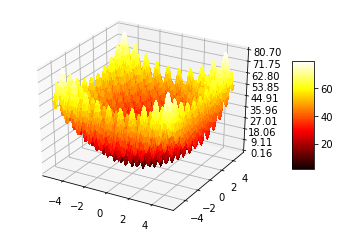

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pylab import meshgrid


x1 = np.arange(-5.12, 5.12, 0.1)
x2 = np.arange(-5.12, 5.12, 0.1)
X,Y = meshgrid(x1,x2)
Z = f2(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                      cmap=cm.hot,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Gerar uma população inicial:

In [37]:
def initial_population(size):
  population = (10.24)*np.random.rand(size, n) - 5.12

  return population

In [38]:
population = initial_population(10)
population

array([[ 2.01013525, -4.74966827],
       [ 3.86590971, -0.94403324],
       [ 3.78475453, -0.53705365],
       [-4.25482042, -2.92735032],
       [ 3.37914729,  0.07512981],
       [-0.10491822,  2.27717852],
       [-0.43720305, -1.41556945],
       [ 2.76982385, -2.35684507],
       [ 2.83222773, -1.90413498],
       [ 4.91705007,  0.22704607]])

Calcula o fitness de cada indíviduo:

In [39]:
f(population[3], 2)

37.99957221619447

In [40]:
def fitness(population, size):

  fitness = np.zeros((size,))
  for i in range(0,len(population)):
    
    fitness[i] = f(population[i,:], n)

  population = np.column_stack((population, fitness))
  population = population[np.argsort(population[:,-1])]

  return population

In [41]:
populationf = fitness(population, 10)
populationf

array([[ 2.83222773, -1.90413498, 18.46739044],
       [-0.10491822,  2.27717852, 18.99124043],
       [ 3.86590971, -0.94403324, 19.79251272],
       [ 3.37914729,  0.07512981, 29.77082683],
       [ 4.91705007,  0.22704607, 34.11941442],
       [ 2.01013525, -4.74966827, 36.64110571],
       [-4.25482042, -2.92735032, 37.99957222],
       [ 2.76982385, -2.35684507, 38.20455036],
       [-0.43720305, -1.41556945, 40.05220098],
       [ 3.78475453, -0.53705365, 42.17662332]])

In [42]:
def crossover(population, size, crossover_rate, k, op):
  new_population = []

  new_population.append(list(population[0,:n]))
  while(len(new_population) < size):

    #torneio
    p1 = population[np.min(np.random.choice(np.arange(0,size), size=k)),:n]

    p2 = population[np.min(np.random.choice(np.arange(0,size), size=k)),:n]

    if np.random.random() <= crossover_rate:
      if op == 'radcliff':
        beta = np.random.random()
        f1 = beta * p1 + (1-beta) * p2
        f2 = (1-beta) * p1 + beta * p2
        new_population.append(list(f1))
        new_population.append(list(f1))
      if op == 'wright':
        f1 = 0.5 * p1 + 0.5 * p2
        f2 = 1.5 * p1 - 0.5 * p2
        f3 = -0.5 * p1 + 1.5 * p2
        fs = np.array([f1,f2,f3])
        fitness = np.array([f(f1, n), f(f2, n), f(f3, n)])
        worst = np.argmax(fitness)
        for i in range(3):
          if i != worst:
            new_population.append(list(fs[i]))

    else:
      new_population.append(list(p1))
      new_population.append(list(p2))
    
  if len(new_population) > size:
    del new_population[-1]


  return np.array(new_population)

In [43]:
populationc = crossover(populationf, 10, crossover_rate=1, k=3, op='wright')
populationc

array([[ 2.83222773, -1.90413498],
       [ 2.83222773, -1.90413498],
       [ 2.83222773, -1.90413498],
       [ 3.34906872, -1.42408411],
       [ 2.31538674, -2.38418585],
       [ 1.36365476,  0.18652177],
       [ 4.3008007 , -3.99479172],
       [ 0.33111482, -1.35015212],
       [ 9.50298531,  1.80424427],
       [-2.17986932, -0.3250859 ]])

In [44]:
def mutation(population, mutation_rate):

  for element in population:
    if np.random.random() <= mutation_rate:
      element[np.random.randint(2)] = (10.24)*np.random.random() - 5.12

  return population


In [45]:
population = mutation(populationc, mutation_rate=0.1)
population

array([[ 2.83222773, -1.90413498],
       [ 1.12581691, -1.90413498],
       [ 2.83222773, -1.90413498],
       [ 3.34906872, -1.42408411],
       [ 2.31538674, -2.49682596],
       [ 1.36365476,  0.18652177],
       [ 4.3008007 , -3.99479172],
       [ 0.33111482, -1.35015212],
       [ 9.50298531,  1.80424427],
       [-2.17986932, -0.3250859 ]])

In [46]:
def genetic_algorithm(size, crossover_rate=0.6, k=3, geracoes=200, mutation_rate=0.1, op='radcliff'):

  population = initial_population(size=size)

  resultados = []
  resultados_media = []

  for _ in range(geracoes):

    populationf = fitness(population, size=size)
    populationc = crossover(populationf, size=size, crossover_rate=crossover_rate, k=k, op=op)
    population = mutation(populationc, mutation_rate=mutation_rate)

    resultados.append(populationf[0,n])
    resultados_media.append(np.sum(populationf[:,n])/populationf.shape[0])


  #population = population[np.argsort(population[:,-1])]
  return population, resultados, resultados_media

In [50]:
p, r, rm = genetic_algorithm(size=100, geracoes=100)

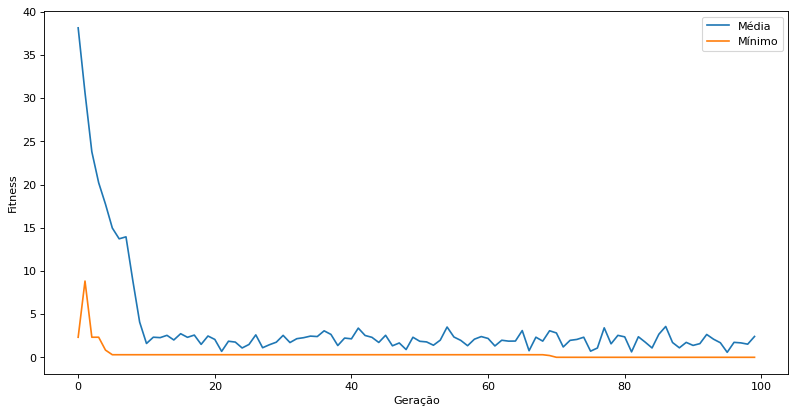

In [51]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

plt.plot(rm, label='Média');
plt.plot(r, label='Melhor resultado');

plt.legend(['Média', 'Mínimo'])
plt.xlabel("Geração")
plt.ylabel("Fitness")

plt.show();

In [49]:
p, r

(array([[7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 4.79450691e+00],
        [7.58735742e-10, 1.45093231e+00],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 2.18300079e+00],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.57741166e-04],
        [7.58735742e-10, 3.5774116